# Import necessary libraries and modules

In [109]:
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_vec_env
import sys
sys.path.append("../rl")  # Adjust the path to the directory of the module
import importlib
import dominoes_env
importlib.reload(dominoes_env)
from dominoes_env import DominoesEnv  # Import the class
import numpy as np
import matplotlib.pyplot as plt

# Use GPUs if possible

In [112]:
import torch

# Check if CUDA is available
print("CUDA available: ", torch.cuda.is_available())
print("Available GPUs: ", torch.cuda.device_count())
if torch.cuda.is_available():
    print("Current CUDA device: ", torch.cuda.current_device())
    print("Device name:", torch.cuda.get_device_name(torch.cuda.current_device()))


CUDA available:  False
Available GPUs:  0


Using cpu device


# Train the agent and save the model

In [98]:
def make_env():
    env = DominoesEnv(9, 12, 4)
    return env

env = make_vec_env(make_env, n_envs=1)
model = DQN('MlpPolicy', env, verbose=1)

# Check if there is a model to load
try:
    model.load("dqn_dominoes")
except:
    print("No model found, training a new one")

model.learn(total_timesteps=int(1e5))
model.save("dqn_dominoes")

Using cpu device
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.5     |
|    ep_rew_mean      | -5.5     |
|    exploration_rate | 0.996    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 8354     |
|    time_elapsed     | 0        |
|    total_timesteps  | 46       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | -5.88    |
|    exploration_rate | 0.991    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 8428     |
|    time_elapsed     | 0        |
|    total_timesteps  | 97       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | -5.88    |
|    exploration_rate | 0.991    |
| time/               |          |
|  

# Load and evaluate the trained model

In [104]:
# Assuming you have a way to determine wins and calculate penalties
total_rewards = []
total_wins = 0
total_losses = 0
cumulative_rewards = 0

# Record rewards each episode
episode_rewards = []

# Track other metrics as needed, e.g., steps per episode
steps_per_episode = []

model = DQN.load("dqn_dominoes")

num_episodes = 1000  # Define how many episodes you want to run

for episode in range(num_episodes):
    obs = env.reset()
    episode_reward = 0
    step_count = 0
    
    while True:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        episode_reward += reward
        step_count += 1
        
        if done:
            total_rewards.append(episode_reward)
            steps_per_episode.append(step_count)
            cumulative_rewards += episode_reward
            # Optionally process info dict if it contains "win" or specific flags
            if info[0]['won']:
                total_wins += 1
            if info[0]['lost']:
                total_losses += 1
            break

average_reward = cumulative_rewards / num_episodes


[{'won': False, 'lost': False, 'TimeLimit.truncated': False}]
[{'won': False, 'lost': False, 'TimeLimit.truncated': False}]
[{'won': False, 'lost': False, 'TimeLimit.truncated': False}]
[{'won': False, 'lost': False, 'TimeLimit.truncated': False}]
[{'won': False, 'lost': False, 'TimeLimit.truncated': False}]
[{'won': False, 'lost': False, 'TimeLimit.truncated': False}]
[{'won': False, 'lost': False, 'TimeLimit.truncated': False}]
[{'won': False, 'lost': False, 'TimeLimit.truncated': False}]
[{'won': False, 'lost': False, 'TimeLimit.truncated': False}]
[{'won': False, 'lost': False, 'TimeLimit.truncated': False}]
[{'won': False, 'lost': False, 'TimeLimit.truncated': False}]
[{'won': False, 'lost': True, 'episode': {'r': 12.0, 'l': 12, 't': 284.41197}, 'TimeLimit.truncated': False, 'terminal_observation': array([4, 5, 0, 7, 2, 6, 4, 4, 1, 8, 1, 6, 3, 6, 0, 5, 0, 9, 8, 9, 1, 9,
       2, 9, 1, 7, 7, 2, 2, 8, 8, 0, 0, 0, 0, 1, 1, 4, 4, 6, 6, 8, 8, 3,
       3, 4, 4, 7, 7, 7, 7, 6, 6, 5, 5,

# Tabulate the data

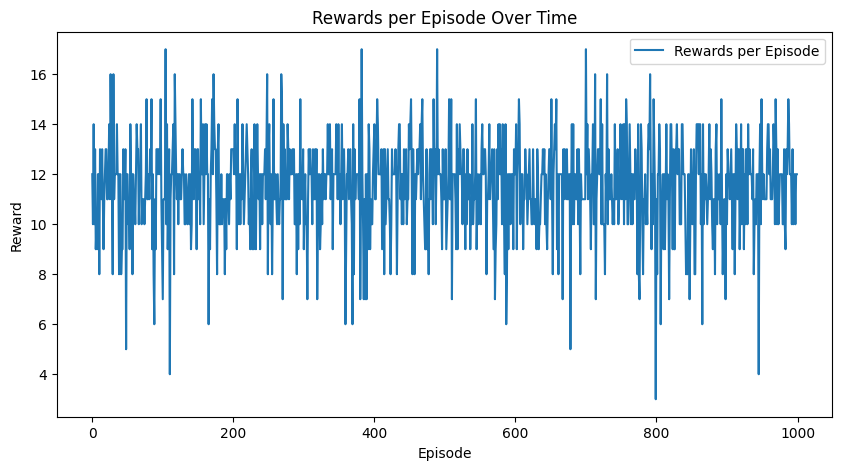

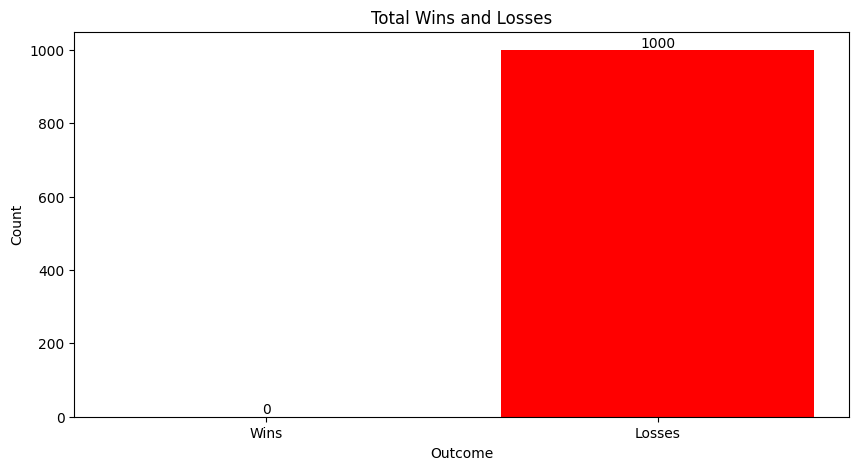

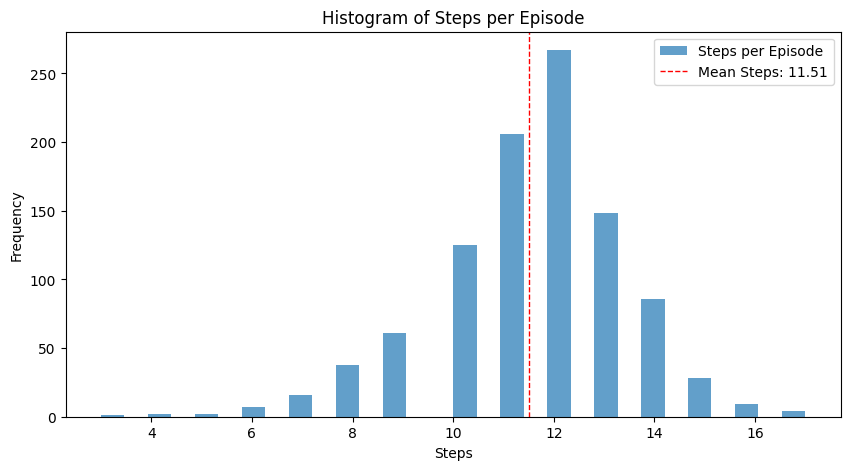

In [105]:
# Plotting rewards per episode
plt.figure(figsize=(10, 5))
plt.plot(total_rewards, label='Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards per Episode Over Time')
plt.legend()
plt.show()

# Bar chart of wins and losses
plt.figure(figsize=(10, 5))
labels = ['Wins', 'Losses']
values = [total_wins, total_losses]
bars = plt.bar(labels, values, color=['blue', 'red'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Total Wins and Losses')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, int(yval), ha='center', va='bottom')

plt.show()

# Plotting average rewards and step count
plt.figure(figsize=(10, 5))
plt.hist(steps_per_episode, bins=30, alpha=0.7, label='Steps per Episode')
plt.axvline(np.mean(steps_per_episode), color='r', linestyle='dashed', linewidth=1, label=f'Mean Steps: {np.mean(steps_per_episode):.2f}')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.title('Histogram of Steps per Episode')
plt.legend()
plt.show()


# Close the environment

In [60]:
env.close()